In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system, solve_nc_sc
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
# record runtime
import timeit
start = timeit.default_timer()

system_nc_sc, F_matrix_nc_sc = solve_nc_sc() 

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  7559.44130738196


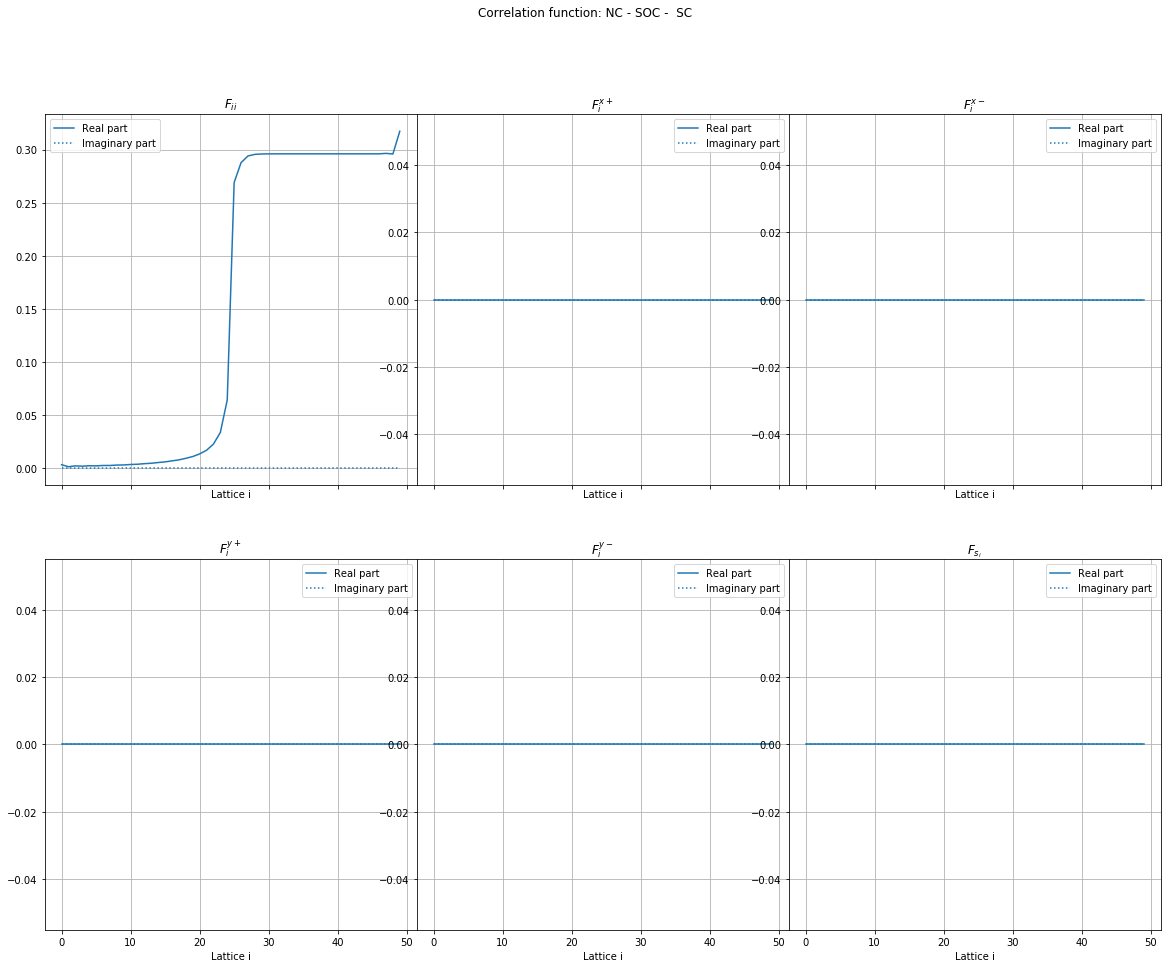

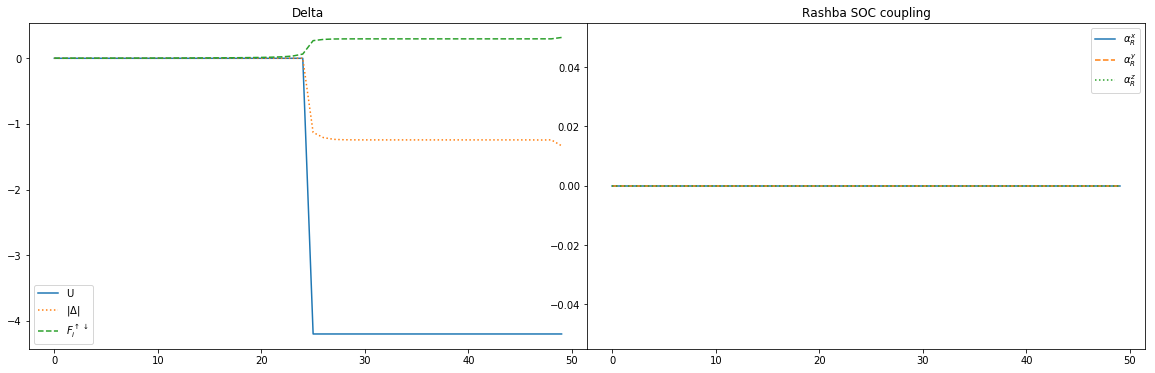

In [3]:
plot_pairing_amplitude(system_nc_sc, F_matrix_nc_sc) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h3> Now, calculate DOS and plot for each medium

import pickle

with open('test_nc_sc.pkl', 'wb') as output:
    pickle.dump(system_nc_sc, output, pickle.HIGHEST_PROTOCOL)

import sys
sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from plots import plot_pairing_amplitude, plot_density_of_states


import pickle

with open('test_nc_sc.pkl', 'rb') as input:
    system_nc_sc = pickle.load(input)

In [4]:
# record runtime
import timeit
start = timeit.default_timer()

ldos, energy_state = system_nc_sc.ldos_from_problem(0.01, 0.09, -6, 6) # resolution, sigma, min e, max e #0.01, 0.03, -6, 6

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start)

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/system_class.py:810: ComplexWarning: Casting complex values to real discards the imaginary part
  ldos[ii, ei] += np.sum(us[:,:,:] * pos_ldos[:,:,:])


Time:  11414.172101336997


In [5]:
print(ldos.shape)
print(energy_state.shape)

(50, 1200)
(1200,)


(1200,)
(50, 1200)


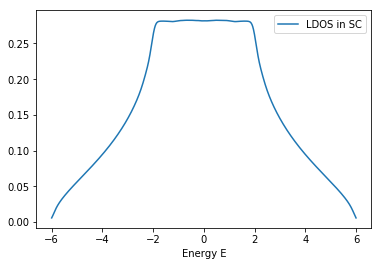

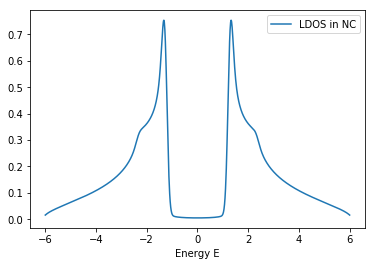

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/plots.py:76: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(es, np.sum(ldos[L_sc_0+L_nc:L_sc_0+L_nc+L_soc], axis=0)/L_soc, label='LDOS in S0C')


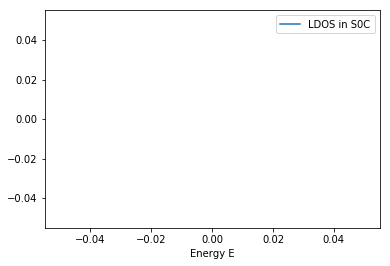

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/plots.py:82: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(es, np.sum(ldos[L_sc_0+L_soc+L_nc:], axis=0)/L_sc, label='LDOS in SC')


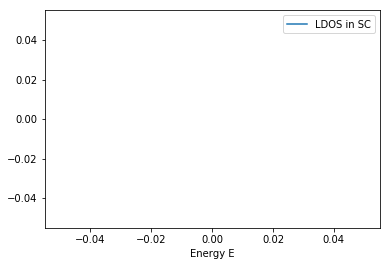

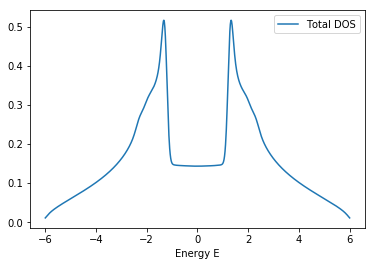

In [6]:
plot_density_of_states(energy_state, ldos, L_sc_0 = 25, L_nc=25, L_sc=0, L_soc=0)

Text(0,0.5,'Energy')

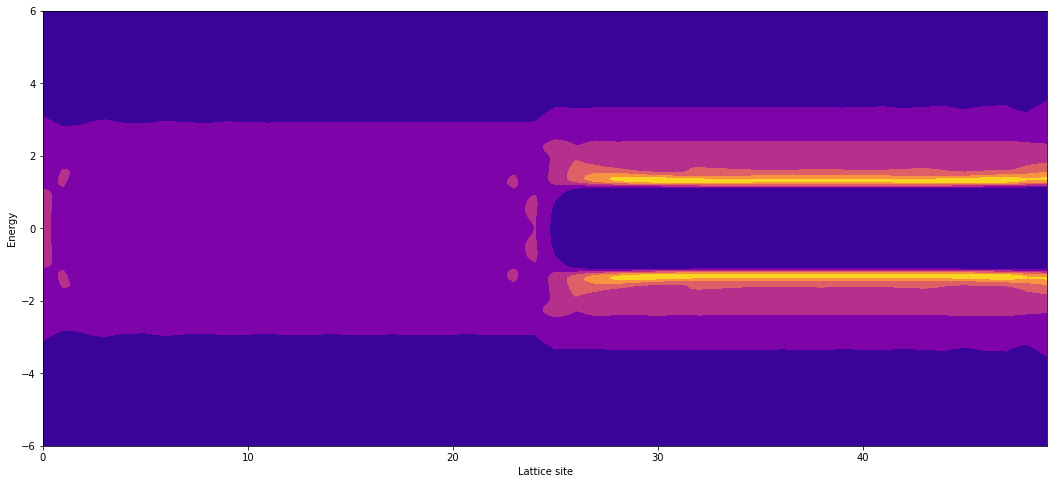

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma)#, levels=np.linspace(0, 1, 500))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

<h3> Save solved system

In [8]:
np.savez('results_for_nc_sc_correctdos.npz', ldos, energy_state, system_nc_sc.F_matrix, system_nc_sc.L_x)

In [17]:
#npzfile = np.load('results_for_nc_sc_final_ldos_energies_f_lx.npz')

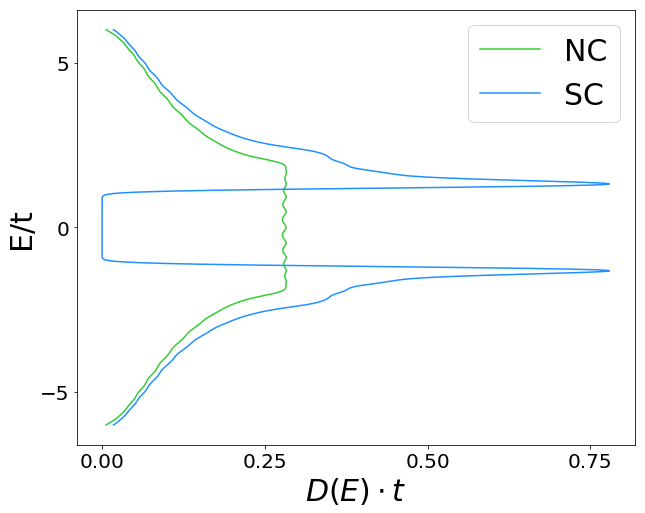

[-6.         -5.98999166 -5.97998332 ...  5.97998332  5.98999166
  6.        ]
0.7792848493718445
-1.316096747289408


In [11]:
#x = npzfile['arr_1']
#y_nc = npzfile['arr_0'][int(25/2)]
#y_sc = npzfile['arr_0'][int(25 + 25/2)]
#y = np.sum(npzfile['arr_0'], axis=0)/50
x = energy_state
y_nc = ldos[int(system_nc_sc.L_nc/2)]
y_sc = ldos[int(system_nc_sc.L_nc + system_nc_sc.L_sc//2)]
y_all = np.sum(ldos, axis=0)/(system_nc_sc.L_x)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(y_nc,x, color='limegreen',label='NC')
ax.plot(y_sc,x, color='dodgerblue', label='SC')
#ax.plot(x, y)
#ax.set_xticks([x[0], x[int(len(x)/2)], x[-1]])
ax.set_ylabel(r'E/t')
ax.set_xlabel(r'$D(E) \cdot t$')
plt.rc('ytick', labelsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)
#ax.axhline(y=x[np.argmax(y_sc)], ls='--')
plt.locator_params(axis='x', nbins=4)
plt.legend(prop={'size': 30})
plt.savefig('dos_result_nc_sc_lylz100_25_25.png', dpi=200, bbox_inches='tight')
plt.show()

#plt.plot(np.sum(nc_alone.ldos, axis=0)/(nc_alone.L_x), nc_alone.energies)#, label='Total DOS')
#plt.grid()
#plt.ylabel("E/t")
#plt.xlabel("D(E) t")
#plt.savefig('DOS all, mu_s=0.9, mu_soc=0.85, u=-4.2.png', dpi=300, bbox_inches='tight')
#plt.show()
#ax.set_xlabel("Energy E")
#ax.set_title("Density of states : NC - SOC - SC")
print(x)
print(max(y_sc))
print(x[np.argmax(y_sc)])

1.1500671627173376


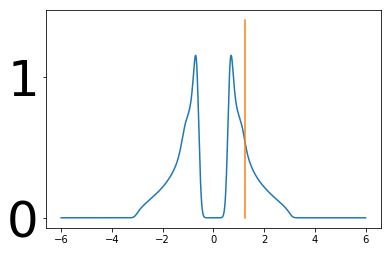

In [41]:
plt.plot(x,y_sc)
print(max(y_sc))
x_line=[1.25,1.25]
y_line=[0,1.4]
plt.plot(x_line,y_line)

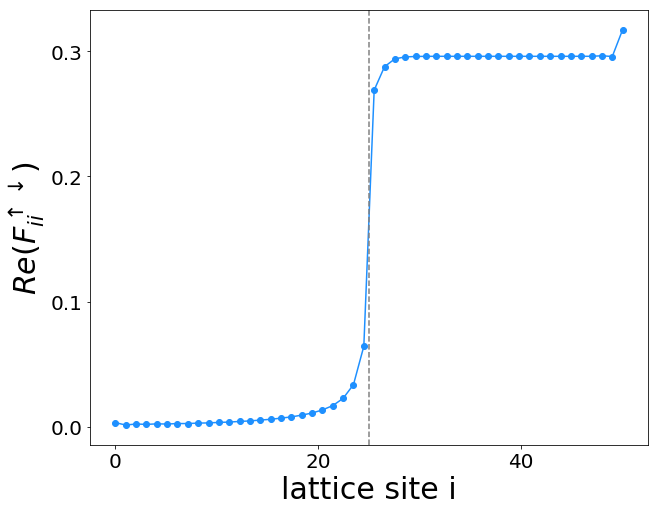

In [13]:
x = np.linspace(0,system_nc_sc.L_x, system_nc_sc.L_x)
y_real = np.real(system_nc_sc.F_matrix[:,0])
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y_real, 'o', color='dodgerblue',label='real part')
ax.plot(x, y_real, color='dodgerblue',label='real part')
#ax.plot(x, y)
#ax.set_xticks([x[0], x[int(len(x)/2)], x[-1]])
ax.set_xlabel(r'lattice site i')
ax.set_ylabel(r'$Re(F_{ii}^{\uparrow\downarrow})$')
plt.rc('ytick', labelsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.xaxis.label.set_fontsize(30)
ax.yaxis.label.set_fontsize(30)
ax.axvline(x=25, ls='--', color='gray')
plt.locator_params(axis='x', nbins=4)
plt.savefig('fmatrix_result_nc_sc_lylz100_25_25.png', dpi=200, bbox_inches='tight')
plt.show()

#plt.plot(np.sum(nc_alone.ldos, axis=0)/(nc_alone.L_x), nc_alone.energies)#, label='Total DOS')
#plt.grid()
#plt.ylabel("E/t")
#plt.xlabel("D(E) t")
#plt.savefig('DOS all, mu_s=0.9, mu_soc=0.85, u=-4.2.png', dpi=300, bbox_inches='tight')
#plt.show()
#ax.set_xlabel("Energy E")
#ax.set_title("Density of states : NC - SOC - SC")

<h1> SNS

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system, solve_sc_nc_sc_10510, solve_sc_nc_sc_101010
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
# record runtime
import timeit
start = timeit.default_timer()

system_sc_nc_sc_10510, F_matrix_sc_nc_sc_10510 = solve_sc_nc_sc_10510() 

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  36728.729763126


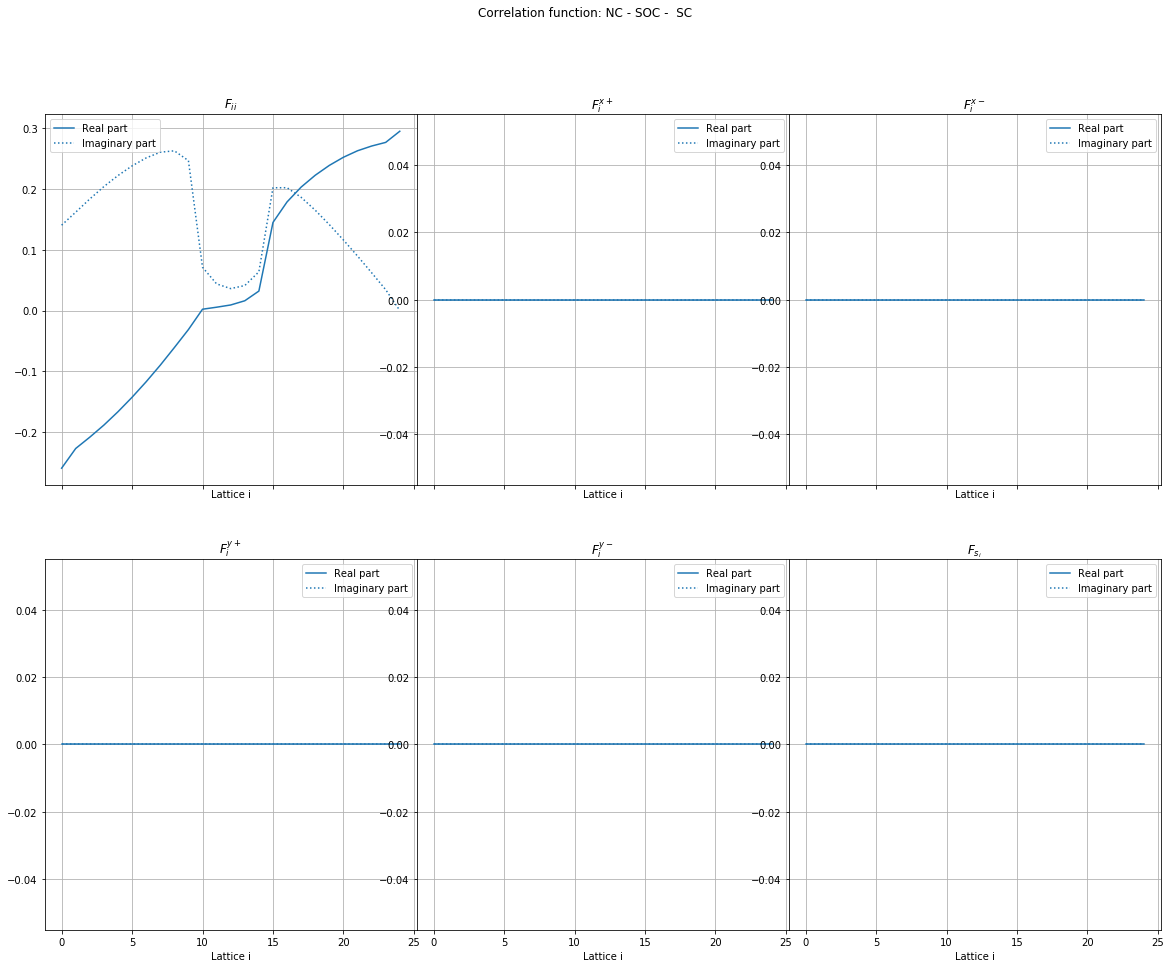

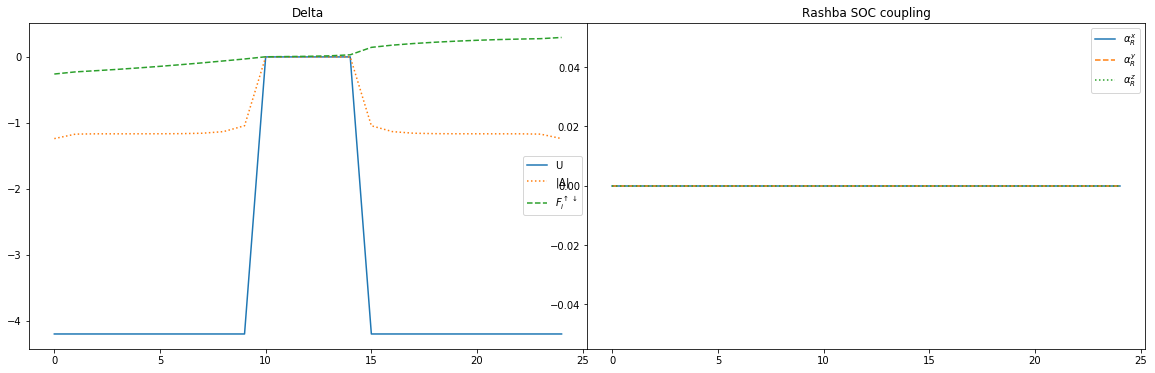

In [3]:
plot_pairing_amplitude(system_sc_nc_sc_10510, F_matrix_sc_nc_sc_10510) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833